In [ ]:
import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd 
import numpy as np 
import scipy as scp
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('data_arrhythmia.csv',delimiter=';',na_values = ['?'])

In [ ]:
df.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,T,P,QRST,J,heart_rate,q_wave,r_wave,s_wave,R'_wave,S'_wave,AA,AB,AC,AD,AE,AF,AG,AH,AI,AJ,AK,AL,AM,AN,AO,AP,AR,AS,AT,AU,...,JO,JP,JR,JS,JT,JU,JV,JY,JZ,KA,KB,KC,KD,KE,KF,KG,KH,KI,KJ,KK,KL,KM,KN,KO,KP,KR,KS,KT,KU,KV,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,13.0,64.0,-2.0,NaN,63.0,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,...,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,37.0,-17.0,31.0,NaN,53.0,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,...,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,34.0,70.0,66.0,23.0,75.0,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,...,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,11.0,-5.0,20.0,NaN,71.0,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,...,0.0,9.0,-7.9,0.0,0.0,0.1,4.1,7.6,51.0,0.4,0.0,15.0,-5.5,0.0,0.0,0.1,3.3,28.8,63.1,0.1,0.0,15.2,-3.7,0.0,0,0.6,3.0,36.8,68.0,0.1,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,13.0,61.0,3.0,NaN,NaN,0,48,40,0,0,28,0,0,0,0,0,0,0,40,24,0,0,24,0,0,0,0,0,0,52,...,0.0,8.5,-10.2,0.0,0.0,-1.0,4.7,-4.0,43.0,-0.2,0.0,15.2,-7.8,0.0,0.0,-0.1,4.9,16.2,63.2,-0.2,0.0,9.1,-0.9,0.0,0,-0.2,2.9,21.7,48.9,-0.4,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


In [ ]:
df.shape

(452, 280)

In [ ]:
df.columns

Index(['age', 'sex', 'height', 'weight', 'qrs_duration', 'p-r_interval',
       'q-t_interval', 't_interval', 'p_interval', 'qrs',
       ...
       'KY', 'KZ', 'LA', 'LB', 'LC', 'LD', 'LE', 'LF', 'LG', 'diagnosis'],
      dtype='object', length=280)

In [ ]:
df.diagnosis.value_counts()

1     245
10     50
2      44
6      25
16     22
4      15
3      15
5      13
9       9
15      5
14      4
7       3
8       2
Name: diagnosis, dtype: int64

In [ ]:
df.diagnosis.value_counts()

1     245
10     50
2      44
6      25
16     22
4      15
3      15
5      13
9       9
15      5
14      4
7       3
8       2
Name: diagnosis, dtype: int64

In [ ]:
df.dtypes

age               int64
sex               int64
height            int64
weight            int64
qrs_duration      int64
                 ...   
LD              float64
LE              float64
LF              float64
LG              float64
diagnosis         int64
Length: 280, dtype: object

In [ ]:
df = df.replace(np.nan, 0)

In [ ]:
df.drop(["J","R'_wave","S'_wave", "AB", "AC", "AD","AE", "AF", "AG", "AL", "AN", "AO", "AP", "AR", "AS", "AT", "AZ", "AB'", "BC", "BD", "BE", "BG", "BH", "BP", "BR", "BS", "BT", "BU", 
          "CA", "CD", "CE", "Cf", "CG", "CH", "CI", "CM","CN","CP","CR","CS","CT","CU","CV","DE","DF","DG","DH","DI","DJ","DR","DS","DT","DU","DV","DY","EG",
          "EH", "EL", "ER", "ET", "EU", "EV", "EY", "EZ", "FA", "FE", "FF", "FH", "FI", "FJ", "FK", "FL", "FM", "FR", "FS", "FU", "FV", "FY", "FZ", "GA",
          "GB", "GG", "GH", "HD", "HE", "HO", "IA", "IB", "IK", "IL", "IY", "JI", "JS", "JT", "KF", "KO", "KP", "LB", "LC", "T", "P", "QRST", "heart_rate"], axis=1, inplace=True)

In [ ]:
df.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,q_wave,r_wave,s_wave,AA,AH,AI,AJ,AK,AM,AU,AV,AY,BB,BF,BI,BJ,BK,BL,BM,BN,BO,BV,BY,BZ,CB,CC,CJ,CK,CL,CO,...,JG,JH,JJ,JK,JL,JM,JN,JO,JP,JR,JU,JV,JY,JZ,KA,KB,KC,KD,KE,KG,KH,KI,KJ,KK,KL,KM,KN,KR,KS,KT,KU,KV,KY,KZ,LA,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,0,52,44,32,0,44,20,36,28,52,40,0,60,0,52,0,0,0,0,0,0,0,56,36,0,32,48,32,0,56,...,-6.4,0.0,0.2,2.9,-12.6,15.2,-0.1,0.0,8.4,-10.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,0,48,0,24,0,64,0,0,24,32,24,0,40,0,48,0,0,0,0,0,0,0,44,20,0,24,0,60,0,20,...,-7.9,0.0,0.8,2.0,-16.4,1.2,0.0,0.0,5.8,-7.7,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,0,40,80,24,20,56,52,0,40,28,116,0,52,0,52,64,0,0,0,88,0,0,36,92,0,24,0,128,0,24,...,-4.1,7.4,0.5,-2.4,20.9,-2.6,0.0,0.0,5.8,-4.1,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,0,72,20,48,0,64,36,0,36,20,52,48,56,0,64,32,0,0,0,72,0,0,60,12,0,44,0,60,44,32,...,-6.9,0.0,-0.5,2.9,-12.7,18.0,0.7,0.0,9.0,-7.9,0.1,4.1,7.6,51.0,0.4,0.0,15.0,-5.5,0.0,0.1,3.3,28.8,63.1,0.1,0.0,15.2,-3.7,0.6,3.0,36.8,68.0,0.1,0.0,12.2,-2.2,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,0,48,40,28,0,40,24,0,24,52,36,0,60,0,48,28,0,0,0,56,0,0,48,36,0,28,44,0,0,0,...,-6.0,0.0,-0.7,2.1,-12.4,8.6,-0.5,0.0,8.5,-10.2,-1.0,4.7,-4.0,43.0,-0.2,0.0,15.2,-7.8,0.0,-0.1,4.9,16.2,63.2,-0.2,0.0,9.1,-0.9,-0.2,2.9,21.7,48.9,-0.4,0.0,13.1,-3.6,-0.1,3.9,25.4,62.8,7


In [ ]:
df.describe()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,q_wave,r_wave,s_wave,AA,AH,AI,AJ,AK,AM,AU,AV,AY,BB,BF,BI,BJ,BK,BL,BM,BN,BO,BV,BY,BZ,CB,CC,CJ,CK,CL,CO,...,JG,JH,JJ,JK,JL,JM,JN,JO,JP,JR,JU,JV,JY,JZ,KA,KB,KC,KD,KE,KG,KH,KI,KJ,KK,KL,KM,KN,KR,KS,KT,KU,KV,KY,KZ,LA,LD,LE,LF,LG,diagnosis
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.00000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,5.628319,51.628319,20.920354,30.035398,5.619469,54.336283,20.59292,0.433628,31.637168,16.026549,41.982301,20.327434,30.513274,0.017699,45.362832,19.327434,7.796460,2.823009,0.070796,31.230088,0.011062,10.274336,43.575221,19.840708,0.0,27.300885,7.477876,50.407080,19.796460,29.876106,...,-9.048894,0.181416,0.001549,2.617920,-17.982743,10.245796,0.768142,-0.653540,8.039602,-10.150664,0.226770,3.894690,-8.269027,32.422788,0.001106,-0.297566,11.839381,-7.034513,0.025664,0.547788,2.535841,10.081195,33.328540,-0.285398,-0.277212,11.369912,-3.607522,0.546681,1.722124,17.840044,32.871460,-0.302434,-0.278982,9.048009,-1.457301,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,10.650001,18.249901,20.541728,10.046393,11.220680,17.248213,21.06105,3.093161,9.624951,21.906457,23.106034,25.365424,18.359850,0.132002,24.813651,17.388960,18.365908,10.319705,1.505153,27.948800,0.104708,17.197818,22.631260,23.000074,0.0,15.496733,15.358883,20.207631,23.192498,13.028458,...,5.890044,0.971688,0.492221,2.409711,25.659801,26.656455,1.444173,3.414085,5.279719,7.066568,0.548988,2.990809,32.157008,37.362289,1.015566,1.758544,5.917391,5.061472,0.166763,0.426941,2.429776,25.074695,34.361665,0.675060,0.992472,4.793656,2.850633,0.370548,1.708190,16.445472,24.421643,0.603551,0.548876,3.472862,2.002430,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,-43.300000,0.000000,-2.300000,-8.600000,-195.300000,-95.100000,-3.300000,-32.900000,0.000000,-48.400000,-3.100000,-11.800000,-242.400000,-146.200000,-3.200000,-20.400000,0.000000,-42.900000,0.000000,-2.600000,-8.200000,-124.800000,-161.400000,-4.800000,-14.200000,0.000000,-30.800000,-0.900000,-5.000000,-56.800000,-63.600000,-5.600000,-4.100000,0.000000,-28.600000,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,0.000000,40.000000,0.000000,24.000000,0.000000,44.000000,0.00000,0.000000,24.000000,0.000000,27.000000,0.000000,16.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,0.000000,0.0,16.000000,0.000000,40.000000,0.000000,24.000000,...,-11.925000,0.000000,-0.300000,1.300000,-25.225000,-4.500000,0.000000,0.0000

In [ ]:
x=df.drop('diagnosis',axis=1)
x1=df['diagnosis']

In [ ]:
x.columns

Index(['age', 'sex', 'height', 'weight', 'qrs_duration', 'p-r_interval',
       'q-t_interval', 't_interval', 'p_interval', 'qrs',
       ...
       'KT', 'KU', 'KV', 'KY', 'KZ', 'LA', 'LD', 'LE', 'LF', 'LG'],
      dtype='object', length=176)

In [ ]:
X = df.drop('diagnosis',axis=1)
y = df['diagnosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:

classifier = LogisticRegression(multi_class='multinomial',solver ='newton-cg')
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[47,  2,  1,  0,  0,  1,  0,  0,  0,  0,  1],
       [ 2,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  8,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 3,  0,  0,  0,  0,  1,  0,  0,  0,  0,  2]])

In [ ]:
print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[47  2  1  0  0  1  0  0  0  0  1]
 [ 2  6  0  0  0  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0]
 [ 1  0  0  0  1  0  0  0  0  0  0]
 [ 2  1  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  1  0  0]
 [ 2  0  0  0  0  0  0  0  8  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  1]
 [ 3  0  0  0  0  1  0  0  0  0  2]]

True Positives(TP) =  47

True Negatives(TN) =  6

False Positives(FP) =  2

False Negatives(FN) =  2


In [ ]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           1       0.80      0.90      0.85        52
           2       0.67      0.75      0.71         8
           3       0.80      1.00      0.89         4
           4       1.00      1.00      1.00         1
           5       1.00      0.50      0.67         2
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         1
           9       1.00      0.50      0.67         2
          10       0.89      0.80      0.84        10
          14       0.00      0.00      0.00         2
          16       0.50      0.33      0.40         6

    accuracy                           0.77        91
   macro avg       0.60      0.53      0.55        91
weighted avg       0.73      0.77      0.74        91



In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)*100
accuracy

76.92307692307693

In [ ]:
from sklearn.metrics import roc_auc_score

Text(0.5, 257.44, 'Predicted label')

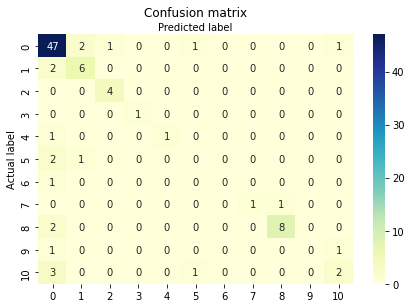

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names=[1,2,3,4,5,6,7,8,9,10,14,15,16] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
p=ACC.mean()
print("Classification Accuracy: {0:0.4f}".format(p*100))

Classification Accuracy: 95.8042


In [ ]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
bf=RandomForestClassifier()
model = BaggingClassifier(base_estimator=bf)
 
# training model
model.fit(X_train, y_train)
 
# predicting the output on the test dataset
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)*100
accuracy

74.72527472527473

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[51,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 3,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 3,  1,  0,  0,  0,  0,  0,  0,  6,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0]])

In [ ]:
print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[51  0  0  0  0  0  0  0  1  0  0]
 [ 3  5  0  0  0  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  1  0  0  0]
 [ 3  1  0  0  0  0  0  0  6  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [ 4  1  1  0  0  0  0  0  0  0  0]]

True Positives(TP) =  51

True Negatives(TN) =  5

False Positives(FP) =  0

False Negatives(FN) =  3


In [ ]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           1       0.73      0.98      0.84        52
           2       0.71      0.62      0.67         8
           3       0.80      1.00      0.89         4
           4       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         1
           9       1.00      0.50      0.67         2
          10       0.86      0.60      0.71        10
          14       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         6

    accuracy                           0.75        91
   macro avg       0.46      0.43      0.43        91
weighted avg       0.64      0.75      0.68        91



Text(0.5, 257.44, 'Predicted label')

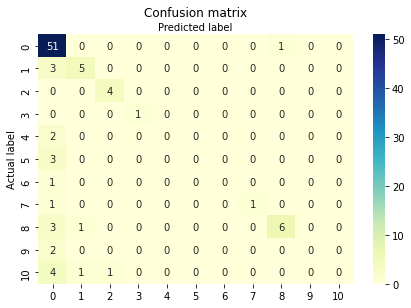

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names=[1,2,3,4,5,6,7,8,9,10,14,15,16] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
p=ACC.mean()
print("Classification Accuracy: {0:0.4f}".format(p*100))

Classification Accuracy: 95.4046


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier 
bf=RandomForestClassifier()
model = AdaBoostClassifier(base_estimator=bf)
 
# training model
model.fit(X_train, y_train)
 
# predicting the output on the test dataset
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)*100
accuracy


72.52747252747253

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[50,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0],
       [ 3,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1],
       [ 4,  1,  0,  0,  0,  0,  0,  0,  5,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0]])

In [ ]:
print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[50  0  0  0  0  0  0  0  2  0  0]
 [ 3  5  0  0  0  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0]
 [ 1  1  0  0  0  0  0  0  0  0  0]
 [ 2  1  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  1]
 [ 4  1  0  0  0  0  0  0  5  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [ 4  1  1  0  0  0  0  0  0  0  0]]

True Positives(TP) =  50

True Negatives(TN) =  5

False Positives(FP) =  0

False Negatives(FN) =  3


In [ ]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           1       0.75      0.96      0.84        52
           2       0.56      0.62      0.59         8
           3       0.80      1.00      0.89         4
           4       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         1
           9       1.00      0.50      0.67         2
          10       0.71      0.50      0.59        10
          14       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         6

    accuracy                           0.73        91
   macro avg       0.44      0.42      0.42        91
weighted avg       0.62      0.73      0.66        91



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

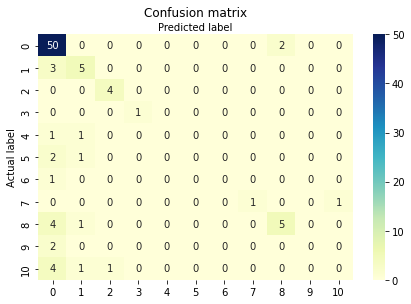

In [ ]:
class_names=[1,2,3,4,5,6,7,8,9,10,14,15,16] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
p=ACC.mean()
print("Classification Accuracy: {0:0.4f}".format(p*100))

Classification Accuracy: 95.0050


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:

from sklearn import model_selection
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
bf=RandomForestClassifier()
model = XGBClassifier(base_estimator=bf)
 
# training model
model.fit(X_train, y_train)
 
# predicting the output on the test dataset
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)*100
accuracy

71.42857142857143

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[48,  1,  0,  1,  0,  1,  0,  0,  1,  0,  0],
       [ 3,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 3,  1,  0,  0,  0,  0,  0,  0,  6,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0]])

In [ ]:
print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[48  1  0  1  0  1  0  0  1  0  0]
 [ 3  5  0  0  0  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0]
 [ 1  1  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  1  0  0  0]
 [ 3  1  0  0  0  0  0  0  6  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [ 4  1  1  0  0  0  0  0  0  0  0]]

True Positives(TP) =  48

True Negatives(TN) =  5

False Positives(FP) =  1

False Negatives(FN) =  3


In [ ]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           1       0.73      0.92      0.81        52
           2       0.56      0.62      0.59         8
           3       0.80      1.00      0.89         4
           4       0.50      1.00      0.67         1
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         1
           9       1.00      0.50      0.67         2
          10       0.86      0.60      0.71        10
          14       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         6

    accuracy                           0.71        91
   macro avg       0.40      0.42      0.39        91
weighted avg       0.62      0.71      0.66        91



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

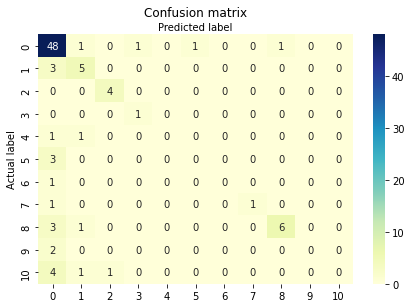

In [ ]:
class_names=[1,2,3,4,5,6,7,8,9,10,14,15,16] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
p=ACC.mean()
print("Classification Accuracy: {0:0.4f}".format(p*100))

Classification Accuracy: 94.8052
